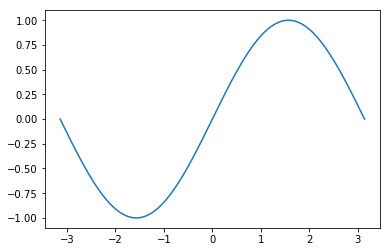

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plot_utility as pu

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.show()

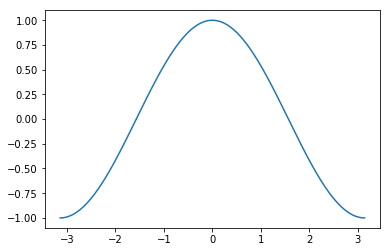

In [2]:
y = np.cos(x)
plt.plot(x, y)
plt.show()

Noto Sans CJK JP is found


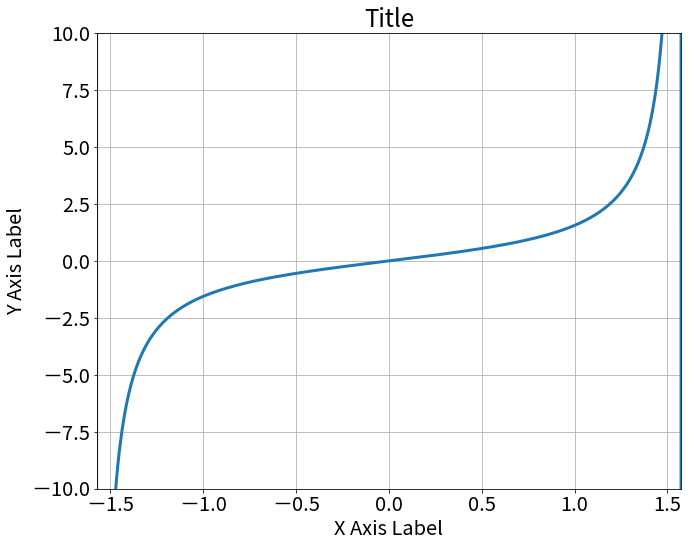

In [7]:
y = np.tan(x)
ax1 = pu.plot_1_graph(fontsize=20,
                      figsize=(10, 8),
                      graph_title="Title",
                      graph_title_size=None,
                      xlabel="X Axis Label", ylabel="Y Axis Label",
                      axis_label_size=None,
                      legend_size=17,
                      xlim=(-np.pi/2, np.pi/2),
                      ylim=(-10, 10),
                      xtick=None,
                      ytick=None,
                      xtick_size=None, ytick_size=None,
                      linewidth=3)
ax1.plot(x, y)
plt.show()

In [9]:
np.arctan(0)

0.0

# BT.2407 の手法調査

## A2.4 Lightness mapping

* **focal point** なる変換点(焦点)を決める。
* focal point は 横軸 Chroma, 縦軸 Lightness の平面で $L_{focal}^*, C_{focal}^*$ の2種類ある
* focal point を求めるために、最初に BT.2020 と BT.709 の **cups** を推定する
  * cups とは与えられた Hue にて最大の chroma をもつ色である
* BT.709 と BT.2020 の cups を通る直線と Lightness の軸との交点を $L_{cusp}^*$ と定義する
* $C_{focal}^*$ は 上記の直線と Chroma の軸との交点の **絶対値** である。
* $L_{focal}^*$ は $L_{cusp}^*$ を limited range? にしたものである。57.47～92.74。
 * chroma の loss やら を防ぐため
 * 具体的な値は Figure A2-4 参照
 
 ![fig_2_4](./doc/img/fig24.PNG)

## A2.5 Hue mapping

* 単純に Hue を維持したままのマッピングはイマイチ
* 特に Yellow は a*b* 平面で確認するとメッチャ Chroma が小さくなる
* なのでひと手間かけるよん

* ひと手間かけない場合は 式2-3, っかける場合は 式2-4 で変換する
* 式2-3 の $r$ は Lightness Mapping と合わせていい感じに行くように調整する



# BT.2407 Annex2 の実装

## とりあえず L\*a\*b* 空間に慣れよう

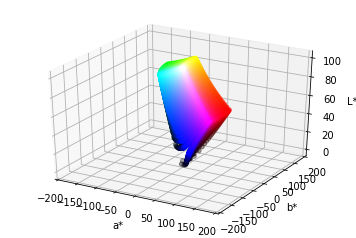

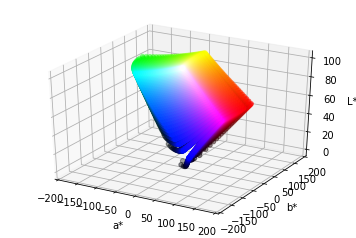

In [1]:
import color_science_study as css
css.plot_lab_color_space('ITU-R BT.709', 33)
css.plot_lab_color_space('ITU-R BT.2020', 33)

## Chroma-Lightness 平面をプロットしてみる

RGBMYC の Primary の Yを振って L\*a\*b\* でプロットしてみる。

data は以下の2種類必要か？

* black から cusp に伸びるやつ
* white から cusp に伸びるやつ

Red の例は以下

```
r = [(0, 0, 0), (0.333, 0.0, 0.0), (0.666, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.333, 0.333), (1.0, 0.666, 0.666), (1.0, 1.0, 1.0)]
```

